In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb
import otkerneldesign as otkd

In [3]:
from matplotlib import rc, rcParams, style
#style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Times'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [4]:
import scipy.io
mat = scipy.io.loadmat('yutian_mixture.mat')

# Gaussian mixture

In [5]:
problem = ctb.CentralTendencyGaussianMixture()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

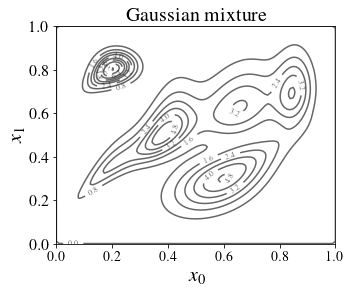

In [6]:
d = ctb.DrawFunctions()
fig = d.draw_2D_controur('Gaussian mixture', None, distribution, nb_isocurves=12, contour_values=True)

In [7]:
dimension = distribution.getDimension()
size = 50
candidate_set_size = int(2**13)
seq = ot.SobolSequence(distribution.getDimension())
sobol_experiment = ot.LowDiscrepancyExperiment(seq, distribution, candidate_set_size, False)
candidate_set = sobol_experiment.generate()
#candidate_set = distribution.getSample(candidate_set_size)

In [8]:
ker_list = [ot.MaternModel([0.1], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)

In [9]:
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set=candidate_set,
    #distribution=distribution
)
kh_design = kh.select_design(size)

<Figure size 360x288 with 0 Axes>

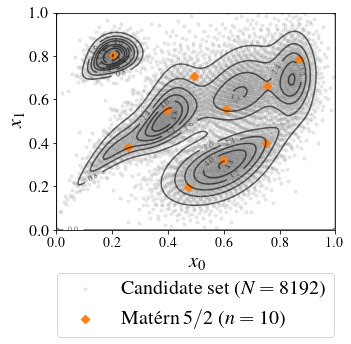

<Figure size 360x288 with 0 Axes>

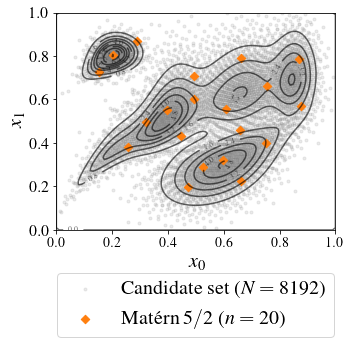

<Figure size 360x288 with 0 Axes>

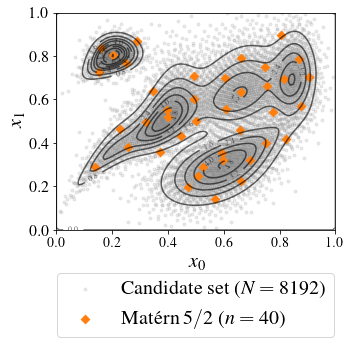

In [17]:
for size in [10, 20, 40]:
    plt.figure(figsize=(5, 4))
    fig = d.draw_2D_controur('', None, distribution, nb_isocurves=12)
    plt.scatter(candidate_set[:, 0], candidate_set[:, 1], label='Candidate set ($N={}$)'.format(candidate_set_size), marker='.', alpha=0.15, color='C7')
    plt.scatter(kh_design[:size, 0], kh_design[:size, 1], label='Matérn $5/2$ ($n={}$)'.format(size), marker='D', color='C1')
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=1, columnspacing=1.2, fontsize=20)
    #plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center') # outside bounds
    plt.savefig('res/gaussian_mixture_sampling{}.pdf'.format(size), bbox_inches='tight', dpi=300);
plt.show()

/home/g88077/miniconda4/envs/uqwind/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/g88077/miniconda4/envs/uqwind/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/g88077/miniconda4/envs/uqwind/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, Futu

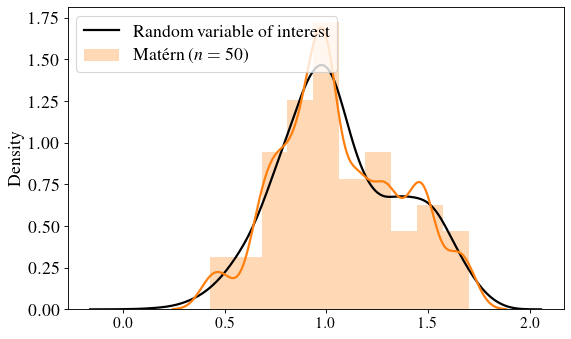

In [11]:
import seaborn as sns
output_rv = problem.getRandomVector()
output_sample = np.array(output_rv.getSample(10000)).flatten()
output_kh = kh_design[:, 0] + kh_design[:, 1]
kwargs = dict(hist_kws={'color':'C1', 'alpha':.3}, kde_kws={'color':'C1', 'bw':0.2, 'linewidth':2})
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(output_sample, color='k', linewidth=2, bw=0.2, label="Random variable of interest")
sns.distplot(output_kh, color="C0", bins=10, **kwargs, label="Matérn ($n={}$)".format(len(output_kh)))
plt.savefig('res/gaussian_mixture_histo.pdf', bbox_inches='tight');
plt.legend(loc='upper left');

## Benchmark

In [12]:
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 200, 50)) + list(range(200, 1000, 100))
#x_bench_sizes = list(range(6, 20, 4)) + list(range(20, 120, 20))
#my_methods = ['kernel herding', 'support points', 'sobol', 'akda']
my_methods = ['Matérn $5/2$', 'Squared exponential', 'Energy-distance', 'QMC']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [13]:
#bench.scale_coefficient = 0.3
#df_benchmark = bench.run_benchmark([problem], candidate_set)
#df_benchmark = df_benchmark.reset_index()
#df_benchmark.to_csv('res/ct_benchmark_{}.csv'.format(problem_name), index=False)

In [14]:
df_benchmark = pd.read_csv("res/ct_benchmark_Gaussian Mixture.csv")
df_benchmark

,Problem,Method,Size,mu,m,m*,std*,MMD,MMD*,weights sum
0,Gaussian Mixture,Energy-distance,6,1.063417,1.103138,1.066082,0.097585,0.014061,7.756957e-03,0.934498
1,Gaussian Mixture,Energy-distance,8,1.063417,1.056736,1.058859,0.072066,0.007374,4.078515e-03,0.947435
2,Gaussian Mixture,Energy-distance,10,1.063417,1.042756,1.056580,0.070067,0.010327,3.759867e-03,0.946453
3,Gaussian Mixture,Energy-distance,12,1.063417,1.067303,1.073505,0.040270,0.003299,1.288490e-03,0.969954
4,Gaussian Mixture,Energy-distance,14,1.063417,1.070018,1.068636,0.029472,0.002730,7.034457e-04,0.978546
...,...,...,...,...,...,...,...,...,...,...
107,Gaussian Mixture,Squared exponential,500,1.063417,1.063075,1.063343,0.000662,0.000159,8.517718e-08,0.999960
108,Gaussian Mixture,Squared exponential,600,1.063417,1.063206,1.063341,0.000594,0.000140,6.405376e-08,0.999962
109,Gaussian Mixture,Squared exponential,700,1.063417,1.063137,1.063344,0.000552,0.000150,5.720423e-08,0.999963
110,Gaussian Mixture,Squared exponential,800,1.063417,1.063360,1.063341,0.000479,0.000133,3.346428e-08,0.999960


## Mean convergence

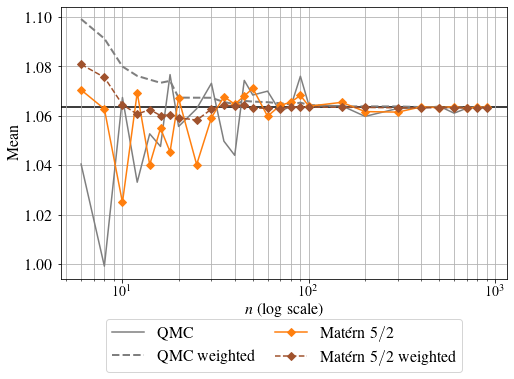

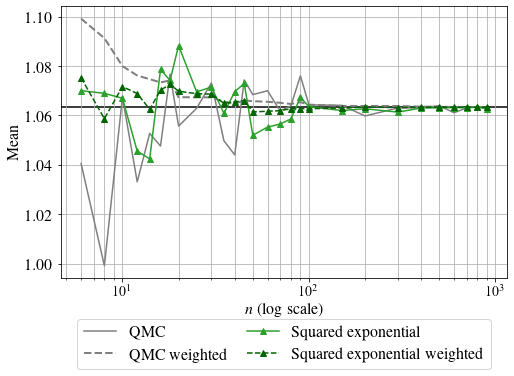

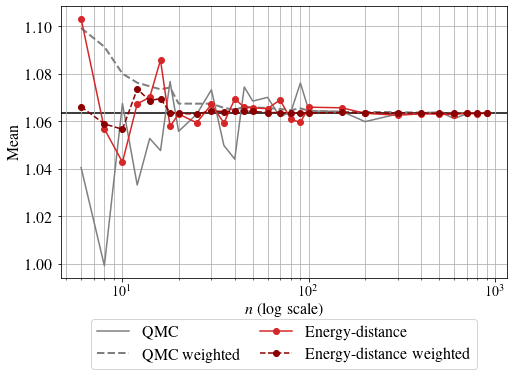

In [15]:
sfile = 'res/{}_convergence_Matern.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', 'Matérn $5/2$'], save_file=sfile)
sfile = 'res/{}_convergence_SE.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, 'Squared exponential'], save_file=sfile)
sfile = 'res/{}_convergence_ED.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, None, 'Energy-distance'], save_file=sfile);

## MMD convergence

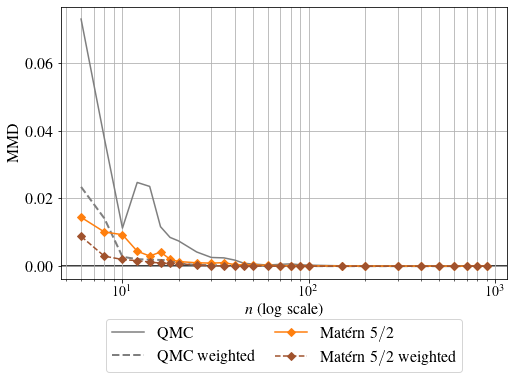

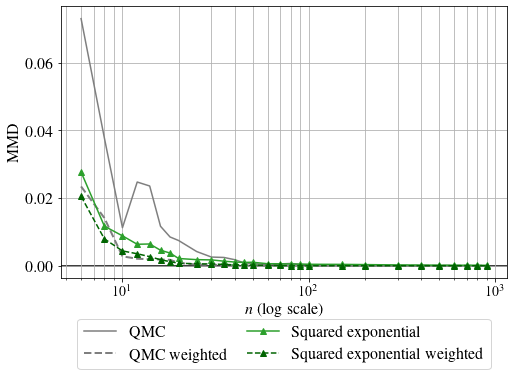

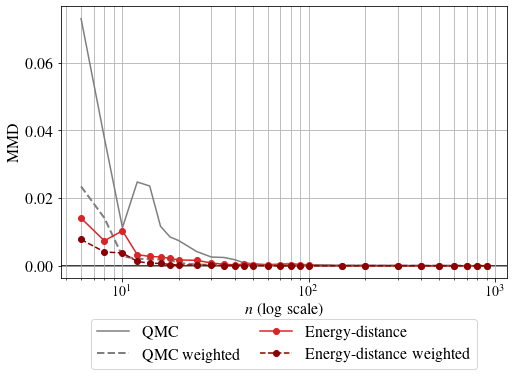

In [16]:
sfile = 'res/{}_convergence_MMD_Matern.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', 'Matérn $5/2$'], is_MMD=True, save_file=sfile)
sfile = 'res/{}_convergence_MMD_SE.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, 'Squared exponential'], is_MMD=True, save_file=sfile)
sfile = 'res/{}_convergence_MMD_ED.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['QMC', None, None, 'Energy-distance'], is_MMD=True, save_file=sfile);